In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/hyperspectral")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/hyperspectral'

In [ ]:
hyper = pd.read_excel("data/raw_data3.xlsx")

In [ ]:
hyper = hyper.iloc[:-1,:]

In [ ]:
lv2 = hyper.loc[:,'level2.reflectance':]

In [ ]:
lv2 = lv2.iloc[1:,:]
lv2

,level2.reflectance,level2.reflectance.1,level2.reflectance.2,level2.reflectance.3,level2.reflectance.4,level2.reflectance.5,level2.reflectance.6,level2.reflectance.7,level2.reflectance.8,level2.reflectance.9,level2.reflectance.10,level2.reflectance.11,level2.reflectance.12,level2.reflectance.13,level2.reflectance.14,level2.reflectance.15,level2.reflectance.16,level2.reflectance.17,level2.reflectance.18,level2.reflectance.19,level2.reflectance.20,level2.reflectance.21,level2.reflectance.22,level2.reflectance.23,level2.reflectance.24,level2.reflectance.25,level2.reflectance.26,level2.reflectance.27,level2.reflectance.28,level2.reflectance.29,level2.reflectance.30,level2.reflectance.31,level2.reflectance.32,level2.reflectance.33,level2.reflectance.34,level2.reflectance.35,level2.reflectance.36,level2.reflectance.37,level2.reflectance.38,level2.reflectance.39,...,level2.reflectance.511,level2.reflectance.512,level2.reflectance.513,level2.reflectance.514,level2.reflectance.515,level2.reflectance.516,level2.reflectance.517,level2.reflectance.518,level2.reflectance.519,level2.reflectance.520,level2.reflectance.521,level2.reflectance.522,level2.reflectance.523,level2.reflectance.524,level2.reflectance.525,level2.reflectance.526,level2.reflectance.527,level2.reflectance.528,level2.reflectance.529,level2.reflectance.530,level2.reflectance.531,level2.reflectance.532,level2.reflectance.533,level2.reflectance.534,level2.reflectance.535,level2.reflectance.536,level2.reflectance.537,level2.reflectance.538,level2.reflectance.539,level2.reflectance.540,level2.reflectance.541,level2.reflectance.542,level2.reflectance.543,level2.reflectance.544,level2.reflectance.545,level2.reflectance.546,level2.reflectance.547,level2.reflectance.548,level2.reflectance.549,level2.reflectance.550
1,0.004456,0.004684,0.004391,0.003574,0.005880,0.007296,0.007406,0.008165,0.009650,0.007898,0.007462,0.006495,0.004276,0.003485,0.003467,0.003314,0.002792,0.003517,0.004140,0.004488,0.004815,0.005947,0.006046,0.004294,0.005903,0.006101,0.006497,0.006436,0.006621,0.007191,0.006796,0.006699,0.006332,0.006746,0.006289,0.005824,0.006011,0.006860,0.007402,0.008960,...,0.062632,0.062870,0.053385,0.056193,0.057829,0.052172,0.056081,0.061201,0.069498,0.066578,0.062156,0.053504,0.058014,0.061255,0.060855,0.062232,0.063488,0.063026,0.064698,0.064364,0.065408,0.062724,0.059315,0.057492,0.062706,0.074785,0.074306,0.094267,0.092729,0.092961,0.082659,0.079509,0.079478,0.060856,0.065756,0.049085,0.117092,0.119156,0.204706,0.094848
2,0.003618,0.003399,0.003112,0.002378,0.005302,0.006933,0.006853,0.007613,0.009206,0.007336,0.006764,0.005901,0.003998,0.003299,0.003298,0.003186,0.002641,0.003440,0.004082,0.004467,0.004877,0.006188,0.006057,0.003946,0.005124,0.005349,0.005530,0.005413,0.005660,0.006454,0.005961,0.005934,0.005607,0.006165,0.005552,0.005086,0.005229,0.005930,0.006336,0.007998,...,0.064846,0.054677,0.058955,0.060535,0.062380,0.066836,0.066997,0.069019,0.059244,0.028584,0.062953,0.121148,0.073880,0.056372,0.056361,0.057063,0.055048,0.056298,0.064108,0.066981,0.065250,0.061101,0.066339,0.074511,0.063333,0.062355,0.070763,0.057630,0.057246,0.056472,0.063211,0.064622,0.065284,0.116402,0.120635,0.298512,0.121947,0.104329,0.053009,0.094532
3,0.005256,0.004775,0.004388,0.003240,0.005597,0.007296,0.007322,0.008070,0.009162,0.007504,0.006659,0.005758,0.003684,0.002991,0.002988,0.002878,0.002388,0.003060,0.003630,0.003971,0.004248,0.005310,0.005410,0.003720,0.005283,0.005572,0.005944,0.005888,0.005730,0.006362,0.005604,0.005632,0.005151,0.005740,0.005364,0.005021,0.005039,0.005605,0.006148,0.007655,...,0.071081,0.068843,0.066928,0.080311,0.068058,0.070668,0.069647,0.072311,0.034555,0.042536,0.054967,0.062830,0.062167,0.056931,0.057010,0.054411,0.049735,0.054787,0.051217,0.057435,0.060088,0.067261,0.071362,0.073727,0.072607,0.078034,0.073651,0.069778,0.079696,0.084162,0.071743,0.070139,0.069491,0.048264,0.057777,0.068132,0.121508,0.121725,0.132099,0.068928
4,0.004549,0.004335,0.003807,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
lv2_scaled = scaler.fit_transform(lv2)

In [ ]:
pca = PCA(n_components=10)
hyp_pca = pca.fit_transform(lv2_scaled)

In [ ]:
result = pd.DataFrame(hyp_pca,columns=['comp1','comp2', 'comp3','comp4','comp5', 'comp6','comp7','comp8', 'comp9','comp10'])
result

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10
0,86.363066,-63.257500,0.758024,6.812082,-16.486988,7.431897,0.211037,0.835902,-3.538982,8.067078
1,94.083725,-73.744616,1.260631,9.960577,-24.667374,6.982120,-4.273689,-7.397707,21.527190,-14.881567
2,83.897427,-69.301684,2.754292,4.374968,-16.062580,4.647939,-4.779000,-3.063449,-0.394904,5.986767
3,72.844673,-62.114711,3.718291,-0.212803,-9.662330,-7.122829,-1.209318,-2.101025,3.138148,0.461844
4,62.602895,-55.946235,3.709025,-3.798924,-4.820241,-8.960330,-1.878626,-5.835205,1.430913,3.509386
...,...,...,...,...,...,...,...,...,...,...
3853,42.421806,-6.361586,6.719185,2.968079,-0.847959,-0.397012,0.093929,0.685539,-1.380100,-0.927477
3854,10.313589,3.259243,2.400101,-0.648907,-0.035904,0.102636,0.028307,-0.181577,0.520050,0.350454
3855,1.682427,2.136413,3.025414,0.200140,0.467484,0.173621,0.040717,-0.204636,0.500853,0.312138
3856,2.884943,2.499853,2.970116,0.017896,0.447423,0.185569,0.043841,-0.219767,0.584028,0.379982


In [ ]:
explained_ratio = pca.explained_variance_ratio_

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_d = np.argmax(cumsum >= 0.99) + 1

In [ ]:
cumsum

array([0.86835769, 0.9348145 , 0.97340334, 0.98386826, 0.9883046 ,
       0.99133622, 0.99267501, 0.99365962, 0.99449239, 0.99512122])

In [ ]:
num_d

6

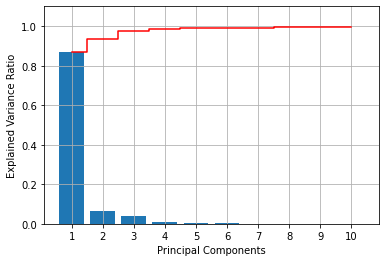

In [ ]:
def explained_variance_ratio_plot(explained_ratio):
    x_axis = range(1, len(explained_ratio)+1)
    plt.bar(x_axis, explained_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()
   
explained_variance_ratio_plot(explained_ratio)

In [ ]:
hyper_y = hyper.iloc[1:,1:5]
hyper_y

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,NaN,29.2,NaN,NaN
2,NaN,29.9,NaN,NaN
3,NaN,27.2,468.4,NaN
4,NaN,24.3,32.8,NaN
5,NaN,22,15.4,816
...,...,...,...,...
3854,15.4,18.6,5.4,71
3855,10.6,9,2,18.7
3856,10,6.4,1.6,16.1
3857,10,6.7,1.7,16.3


In [ ]:
hyper_y[hyper_y['Unnamed: 1'] == 'NaN'].count()

Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [ ]:
hyper_y

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,NaN,29.2,NaN,NaN
2,NaN,29.9,NaN,NaN
3,NaN,27.2,468.4,NaN
4,NaN,24.3,32.8,NaN
5,NaN,22,15.4,816
...,...,...,...,...
3854,15.4,18.6,5.4,71
3855,10.6,9,2,18.7
3856,10,6.4,1.6,16.1
3857,10,6.7,1.7,16.3


In [ ]:
hyper_y.isnull().sum()

Unnamed: 1    111
Unnamed: 2      3
Unnamed: 3     68
Unnamed: 4     65
dtype: int64

In [ ]:
hyper_y2 = hyper_y.fillna(method='ffill')
hyper_y2 = hyper_y.fillna(method='backfill')

In [ ]:
hyper_y2[hyper_y2 == 'NaN'].count()

Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [ ]:
hyper_y2

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,7.2,29.2,468.4,816.0
2,7.2,29.9,468.4,816.0
3,7.2,27.2,468.4,816.0
4,7.2,24.3,32.8,816.0
5,7.2,22.0,15.4,816.0
...,...,...,...,...
3854,15.4,18.6,5.4,71.0
3855,10.6,9.0,2.0,18.7
3856,10.0,6.4,1.6,16.1
3857,10.0,6.7,1.7,16.3


In [ ]:
hyper_y3 = hyper_y2.fillna(method='bfill')
hyper_y3.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,7.2,29.2,468.4,816.0
2,7.2,29.9,468.4,816.0
3,7.2,27.2,468.4,816.0
4,7.2,24.3,32.8,816.0
5,7.2,22.0,15.4,816.0


In [ ]:
y1 = hyper_y2['Unnamed: 1']

In [ ]:
hyper_y.dtypes

Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
from scipy.interpolate import interpld
from scipy.interpolate import interp1d

In [ ]:
hyper_y = hyper_y.astype('float')

In [ ]:
y1 = hyper_y.interpolate(method='linear',limit_direction='forward')

In [ ]:
hyper_y2

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
1,7.2,29.2,468.4,816.0
2,7.2,29.9,468.4,816.0
3,7.2,27.2,468.4,816.0
4,7.2,24.3,32.8,816.0
5,7.2,22.0,15.4,816.0
...,...,...,...,...
3854,15.4,18.6,5.4,71.0
3855,10.6,9.0,2.0,18.7
3856,10.0,6.4,1.6,16.1
3857,10.0,6.7,1.7,16.3


In [ ]:
y1 = hyper_y.interpolate(method='polynomial',order=2)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.preprocessing import scale

In [ ]:
y = hyper_y3[["Unnamed: 1"]]

In [ ]:
y2 = hyper_y3[['Unnamed: 2']]

In [ ]:
y3 = hyper_y3[['Unnamed: 3']]

In [ ]:
y4 = hyper_y3[['Unnamed: 4']]

In [ ]:
X = lv2_scaled

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

In [ ]:
mse = []
n = len(X)
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-pack

In [ ]:
mse2 = []
n = len(X)
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y2, cv=cv, scoring='neg_mean_squared_error').mean()    
mse2.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-pack

In [ ]:
mse3 = []
n = len(X)
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y3, cv=cv, scoring='neg_mean_squared_error').mean()    
mse3.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-pack

In [ ]:
mse4 = []
n = len(X)
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y4, cv=cv, scoring='neg_mean_squared_error').mean()    
mse4.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/dist-pack

In [ ]:
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y2, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse2.append(score)

In [ ]:
for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [ ]:
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y3, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse3.append(score)

In [ ]:
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y4, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse4.append(score)

Text(0.5, 1.0, 'chla')

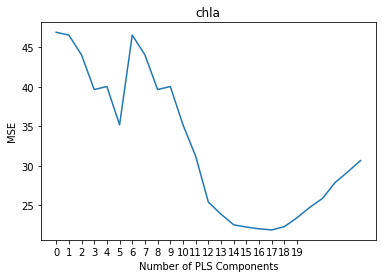

In [ ]:
plt.plot(mse)
plt.xticks(range(0,20))
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('chla')

Text(0.5, 1.0, 'tsm')

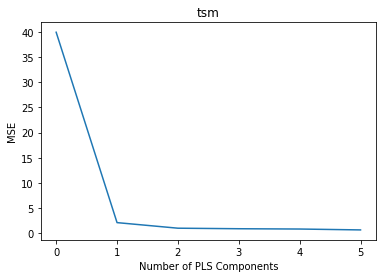

In [ ]:
plt.plot(mse2)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('tsm')

Text(0.5, 1.0, 'kd')

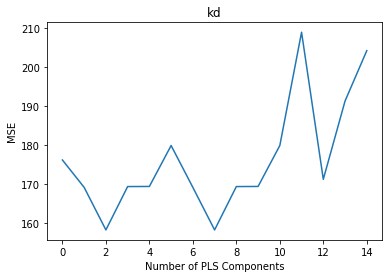

In [ ]:
plt.plot(mse3)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('kd')

Text(0.5, 1.0, 'CPC')

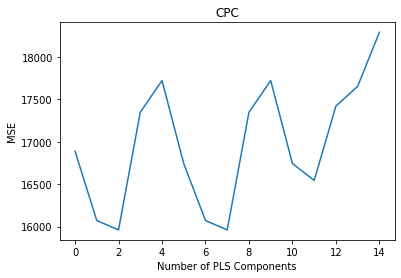

In [ ]:
plt.plot(mse4)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('CPC')